In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df.iloc[:,2:4]=ss.fit_transform(df.iloc[:,2:4])
df

e:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.781797,-1.490046,0
1,15810944,Male,-0.253587,-1.460681,0
2,15668575,Female,-1.113206,-0.785290,0
3,15603246,Female,-1.017692,-0.374182,0
4,15804002,Male,-1.781797,0.183751,0
5,15728773,Male,-1.017692,-0.344817,0
6,15598044,Female,-1.017692,0.418669,0
7,15694829,Female,-0.540127,2.356750,1
8,15600575,Male,-1.208719,-1.078938,0
9,15727311,Female,-0.253587,-0.139263,0


In [8]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(df.iloc[:,2:4],df.iloc[:,4],test_size=0.3,random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtr,ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
dtc.score(xte,yte)

0.875

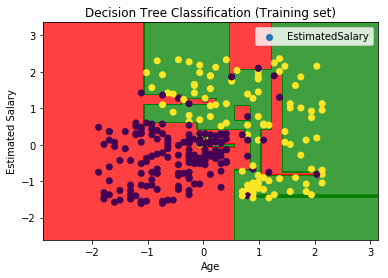

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
X_set, y_set = xtr, ytr
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dtc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.scatter(X_set.iloc[:,0],X_set.iloc[:,1],c =y_set)


plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [15]:
X_set, y_set = xtr, ytr

,Age,EstimatedSalary
92,-1.113206,-1.607506
223,2.134241,0.947237
234,0.032952,1.240885
232,0.223978,1.094061
377,0.415005,-0.491641
142,-0.253587,-0.315452
22,0.988083,-0.844019
252,0.988083,1.886912
350,0.032952,1.270250
168,-0.826666,2.298020
